Importing libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.18.0


In [4]:
IMAGE_SIZE=[224,224] #model requires this much size so it will be used for resizing

In [5]:
train_path='Dataset/Train'
test_path='Dataset/Test'

In [6]:
vgg19=VGG19(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False) #3 tells rgb channel-> dimensions of image are 224,224,3
#include top= false cuts the first and last layer as we are going to give our own sizes of i/p and o/p

In [7]:
vgg19.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
#do not train exsiting weights
for layer in vgg19.layers:
    layer.trainable=False

In [9]:
#number of output classes
folder=glob('Dataset/Train/*')

In [10]:
folder

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [11]:
x=Flatten()(vgg19.output) #flattening our output till second last layer

In [12]:
prediction=Dense(len(folder),activation='softmax')(x) #last layer

In [13]:
model=Model(inputs=vgg19.input,outputs=prediction)

In [14]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,074,562 (76.58 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [15]:
from tensorflow.keras.layers import MaxPooling2D

In [16]:
#cnn
cnn=Sequential()
cnn.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(500,activation="relu"))
cnn.add(Dense(2,activation="softmax"))
cnn.summary()

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │      25,088,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,100,046 (95.75 MB)

 Trainable params: 25,100,046 (95.75 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
#augmenting
train_datagen=ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.3,
                                 horizontal_flip=True)


In [20]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [21]:
#applying augmentation
training_set=train_datagen.flow_from_directory('Dataset/Train',
                                              target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 416 images belonging to 2 classes.


In [22]:
 test_set=test_datagen.flow_from_directory('Dataset/Test',
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='categorical')
                                           

Found 134 images belonging to 2 classes.


In [23]:
r=cnn.fit(training_set,
            validation_data=test_set,
            epochs=10,
            steps_per_epoch=len(training_set),
            validation_steps=len(test_set)
           )

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.4657 - loss: 3.0998 - val_accuracy: 0.6791 - val_loss: 0.6577
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.5700 - loss: 0.6832 - val_accuracy: 0.6791 - val_loss: 0.6554
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.5631 - loss: 0.6569 - val_accuracy: 0.3209 - val_loss: 0.8165
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 903ms/step - accuracy: 0.6564 - loss: 0.6177 - val_accuracy: 0.6791 - val_loss: 0.7761
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 896ms/step - accuracy: 0.6341 - loss: 0.6236 - val_accuracy: 0.3060 - val_loss: 0.8386
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 934ms/step - accuracy: 0.8003 - loss: 0.4714 - val_accuracy: 0.3060 - val_loss: 1.1328
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 936ms/step - accuracy: 0.7927 - loss: 0.4353 - val_accuracy: 0.3582 - val_loss: 0.9308
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 918ms/step - accuracy: 0.8038 - loss: 0.4243 - val_accuracy: 0.4

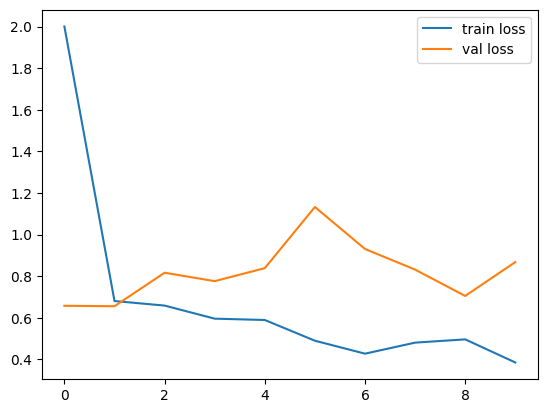

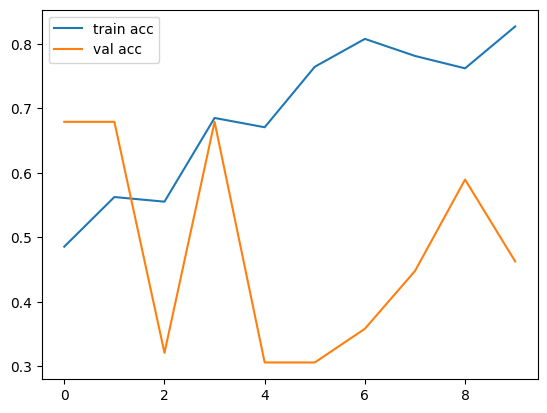

In [24]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [77]:
#vgg

In [44]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [45]:
vgg_run=model.fit(training_set,
            validation_data=test_set,
            epochs=10,
            steps_per_epoch=len(training_set),
            validation_steps=len(test_set)
           )

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 143s 11s/step - accuracy: 0.5206 - loss: 1.6619 - val_accuracy: 0.3433 - val_loss: 1.3343
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 138s 11s/step - accuracy: 0.5880 - loss: 0.7983 - val_accuracy: 0.6791 - val_loss: 0.6222
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 140s 11s/step - accuracy: 0.7078 - loss: 0.6150 - val_accuracy: 0.6791 - val_loss: 0.6390
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 148s 11s/step - accuracy: 0.7649 - loss: 0.4429 - val_accuracy: 0.7239 - val_loss: 0.4297
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 146s 11s/step - accuracy: 0.8760 - loss: 0.3336 - val_accuracy: 0.7612 - val_loss: 0.5028
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 143s 11s/step - accuracy: 0.8518 - loss: 0.3393 - val_accuracy: 0.7239 - val_loss: 0.4238
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 173s 14s/step - accuracy: 0.8228 - loss: 0.4099 - val_accuracy: 0.8433 - val_loss: 0.3855
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 193s 15s/step - accuracy: 0.9037 - loss: 0.2706 - val_accuracy: 0.

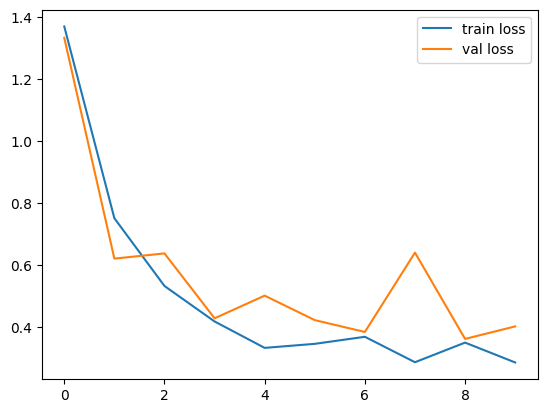

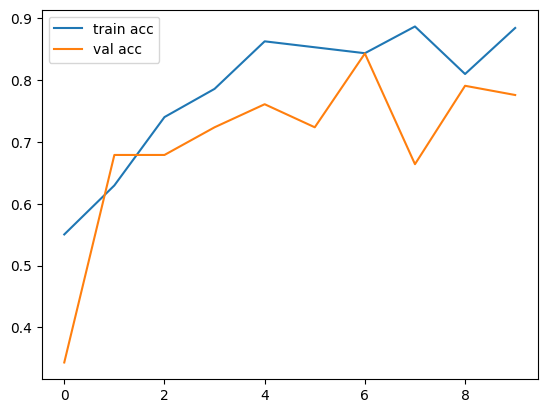

In [46]:
# plot the loss
plt.plot(vgg_run.history['loss'], label='train loss')
plt.plot(vgg_run.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(vgg_run.history['accuracy'], label='train acc')
plt.plot(vgg_run.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [47]:
from tensorflow.keras.models import load_model

In [48]:
model.save('model_vgg19.h5')

In [49]:
Y_pred=model.predict(test_set)

4/5 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/stepWARNING:tensorflow:5 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000012BF41BFE20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 8s/step


In [50]:
Y_pred

array([[3.85391682e-01, 6.14608288e-01],
       [6.65200874e-02, 9.33479905e-01],
       [7.10877061e-01, 2.89122999e-01],
       [4.22925919e-01, 5.77074051e-01],
       [4.24425334e-01, 5.75574636e-01],
       [9.62366536e-02, 9.03763294e-01],
       [1.23263076e-01, 8.76736879e-01],
       [4.63170707e-01, 5.36829352e-01],
       [2.34454781e-01, 7.65545249e-01],
       [1.22214228e-01, 8.77785742e-01],
       [9.86135721e-01, 1.38643198e-02],
       [8.60147655e-01, 1.39852345e-01],
       [3.17826033e-01, 6.82173967e-01],
       [7.40645826e-01, 2.59354174e-01],
       [2.12757036e-01, 7.87243009e-01],
       [7.63907313e-01, 2.36092672e-01],
       [3.86549711e-01, 6.13450348e-01],
       [4.15636599e-01, 5.84363401e-01],
       [4.76525217e-01, 5.23474872e-01],
       [9.77250397e-01, 2.27496270e-02],
       [9.90696192e-01, 9.30377748e-03],
       [8.80348980e-02, 9.11965132e-01],
       [9.18030858e-01, 8.19691122e-02],
       [5.88328242e-01, 4.11671788e-01],
       [2.525151

First value tells parasitic<br> 
second tells non parasitic

In [51]:
Y_pred=np.argmax(Y_pred,axis=1)

In [52]:
Y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0], dtype=int64)

In [53]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [54]:
model=load_model('model_vgg19.h5')

In [55]:
img=image.load_img('Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_110115_cell_123.png',target_size=(224,224)) #do not forget target size here

In [56]:
x=image.img_to_array(img)

In [57]:
x.shape

(224, 224, 3)

In [58]:
x=x/255

In [59]:
x=np.expand_dims(x,axis=0)

In [60]:
img_data=preprocess_input(x)

In [61]:
img_data.shape

(1, 224, 224, 3)

In [62]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 959ms/step


array([[0.5222044, 0.4777956]], dtype=float32)

In [63]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


In [64]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected


In [65]:
img2=image.load_img('Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163029_cell_156.png',target_size=(224,224)) #do not forget target size here

In [66]:
x=image.img_to_array(img2)

In [67]:
x.shape

(224, 224, 3)

In [68]:
x=x/255

In [69]:
x=np.expand_dims(x,axis=0)

In [70]:
img_data2=preprocess_input(x)

In [71]:
img_data2.shape

(1, 224, 224, 3)

In [72]:
model.predict(img_data2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.49346164, 0.5065384 ]], dtype=float32)

In [73]:
a=np.argmax(model.predict(img_data2), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


In [74]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected


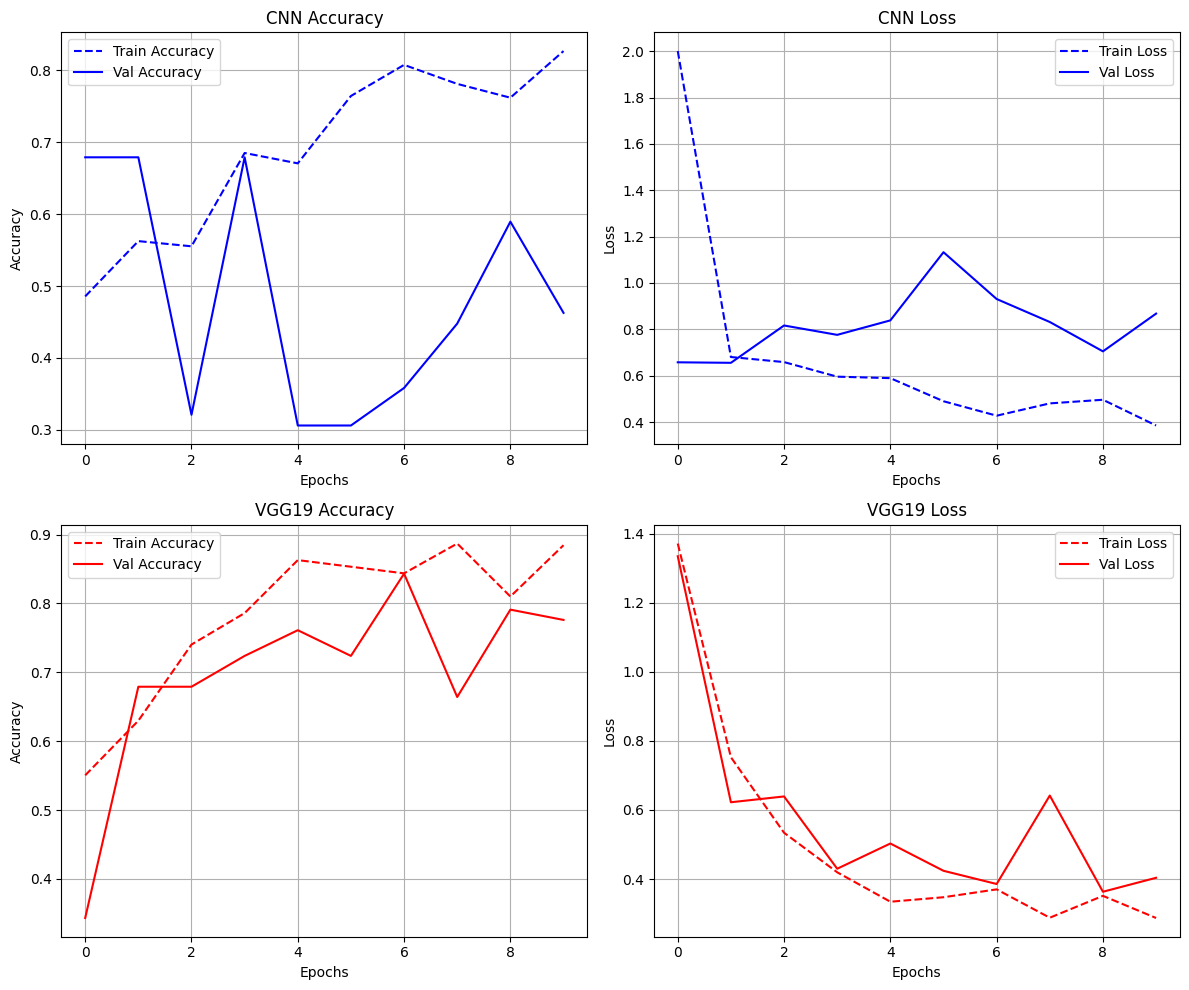

In [76]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 10))

# CNN Accuracy
plt.subplot(2, 2, 1)
plt.plot(r.history['accuracy'], label='Train Accuracy', linestyle='dashed', color='blue')
plt.plot(r.history['val_accuracy'], label='Val Accuracy', linestyle='solid', color='blue')
plt.title('CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# CNN Loss
plt.subplot(2, 2, 2)
plt.plot(r.history['loss'], label='Train Loss', linestyle='dashed', color='blue')
plt.plot(r.history['val_loss'], label='Val Loss', linestyle='solid', color='blue')
plt.title('CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# VGG19 Accuracy
plt.subplot(2, 2, 3)
plt.plot(vgg_run.history['accuracy'], label='Train Accuracy', linestyle='dashed', color='red')
plt.plot(vgg_run.history['val_accuracy'], label='Val Accuracy', linestyle='solid', color='red')
plt.title('VGG19 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# VGG19 Loss
plt.subplot(2, 2, 4)
plt.plot(vgg_run.history['loss'], label='Train Loss', linestyle='dashed', color='red')
plt.plot(vgg_run.history['val_loss'], label='Val Loss', linestyle='solid', color='red')
plt.title('VGG19 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()
